In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('BTC-USD.csv')

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,28-02-2021,46194.01563,46716.42969,43241.61719,45137.76953,45137.76953,5.344389e+10
1,01-03-2021,45159.50391,49784.01563,45115.09375,49631.24219,49631.24219,5.389130e+10
2,02-03-2021,49612.10547,50127.51172,47228.84375,48378.98828,48378.98828,4.753090e+10
3,03-03-2021,48415.81641,52535.13672,48274.32031,50538.24219,50538.24219,5.322081e+10
4,04-03-2021,50522.30469,51735.08984,47656.92969,48561.16797,48561.16797,5.234382e+10


In [4]:
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds            y
0    28-02-2021  45137.76953
1    01-03-2021  49631.24219
2    02-03-2021  48378.98828
3    03-03-2021  50538.24219
4    04-03-2021  48561.16797
..          ...          ...
361  24-02-2022  38332.60938
362  25-02-2022  39214.21875
363  26-02-2022  39105.14844
364  27-02-2022  37709.78516
365  28-02-2022  37830.99609

[366 rows x 2 columns]


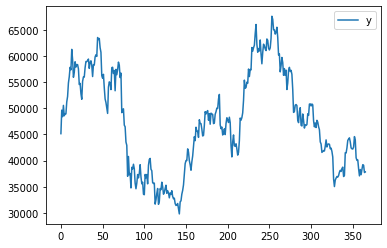

In [5]:
df.plot()

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      366 non-null    datetime64[ns]
 1   y       366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [8]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future_dates=prophet.make_future_dataframe(periods=365)

In [11]:
future_dates

,ds
0,2021-01-03
1,2021-01-04
2,2021-01-05
3,2021-01-06
4,2021-01-07
...,...
726,2023-11-28
727,2023-11-29
728,2023-11-30
729,2023-12-01


In [12]:
prediction=prophet.predict(future_dates)

In [13]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-03,50015.923783,38537.975179,62206.887296,50015.923783,50015.923783,-88.791760,-88.791760,-88.791760,-88.791760,-88.791760,-88.791760,0.0,0.0,0.0,49927.132024
1,2021-01-04,50005.483498,37584.656498,60770.212800,50005.483498,50005.483498,-643.673020,-643.673020,-643.673020,-643.673020,-643.673020,-643.673020,0.0,0.0,0.0,49361.810478
2,2021-01-05,49995.043213,38699.933909,61714.754621,49995.043213,49995.043213,-219.557775,-219.557775,-219.557775,-219.557775,-219.557775,-219.557775,0.0,0.0,0.0,49775.485438
3,2021-01-06,49984.602928,37451.645672,61096.086901,49984.602928,49984.602928,-489.888358,-489.888358,-489.888358,-489.888358,-489.888358,-489.888358,0.0,0.0,0.0,49494.714569
4,2021-01-07,49974.162643,38158.301194,62016.958233,49974.162643,49974.162643,399.179820,399.179820,399.179820,399.179820,399.179820,399.179820,0.0,0.0,0.0,50373.342463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2023-11-28,38054.996637,25933.556019,49056.473999,37957.342349,38162.273800,-219.557775,-219.557775,-219.557775,-219.557775,-219.557775,-219.557775,0.0,0.0,0.0,37835.438861
727,2023-11-29,38043.272551,26268.159439,48287.344949,37945.065154,38150.989865,-489.888358,-489.888358,-489.888358,-489.888358,-489.888358,-489.888358,0.0,0.0,0.0,37553.384192
728,2023-11-30,38031.548464,26531.868444,50254.107593,37932.787959,38139.736967,399.179820,399.179820,399.179820,399.179820,399.179820,399.179820,0.0,0.0,0.0,38430.728284
729,2023-12-01,38019.824378,26782.334366,49598.085164,37920.510764,38128.484069,689.753107,689.753107,689.753107,689.753107,689.753107,689.753107,0.0,0.0,0.0,38709.577485


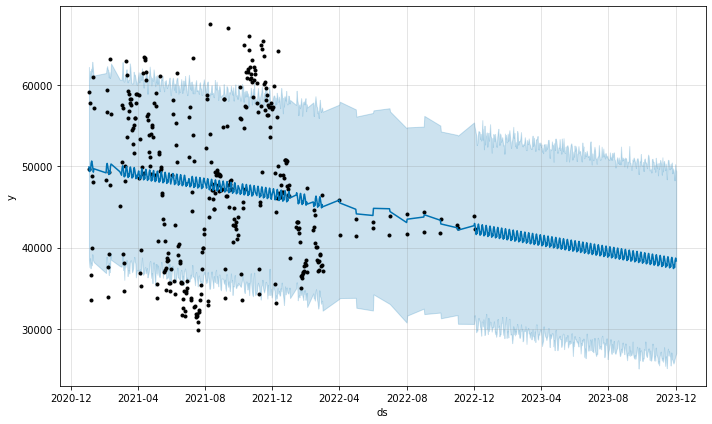

In [14]:
prophet.plot(prediction);

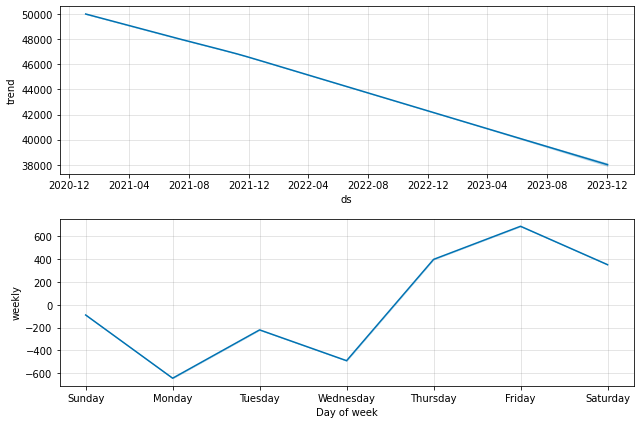

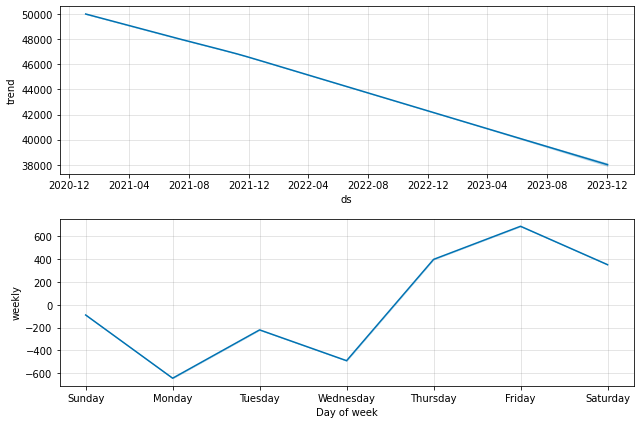

In [15]:
prophet.plot_components(prediction) #visualize each components[daily, quaterly]

In [16]:
df

,ds,y
0,2021-02-28,45137.76953
1,2021-01-03,49631.24219
2,2021-02-03,48378.98828
3,2021-03-03,50538.24219
4,2021-04-03,48561.16797
...,...,...
361,2022-02-24,38332.60938
362,2022-02-25,39214.21875
363,2022-02-26,39105.14844
364,2022-02-27,37709.78516


In [27]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='365', period='90 days', horizon = '180 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-03-12 00:00:00 and 2022-06-05 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-13,41513.192904,31126.120085,51180.502359,61243.08594,2021-03-12
1,2021-03-14,41897.378910,32079.889620,51259.731357,59302.31641,2021-03-12
2,2021-03-15,48907.055445,39311.347935,58716.304218,55907.19922,2021-03-12
3,2021-03-16,53144.940847,43401.312374,61829.411067,56804.90234,2021-03-12
4,2021-03-17,45952.840104,36320.497184,55763.362107,58870.89453,2021-03-12


In [28]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,15 days,8.949184e+07,9460.012457,8166.560084,0.174573,0.160974,0.741379
1,16 days,8.360248e+07,9143.439044,7878.948882,0.171534,0.160974,0.750000
2,17 days,7.545563e+07,8686.520017,7580.415726,0.167827,0.155919,0.784483
3,18 days,7.133187e+07,8445.819875,7494.898012,0.168391,0.156121,0.793103
4,19 days,7.371545e+07,8585.770026,7610.189095,0.171568,0.160974,0.767241


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


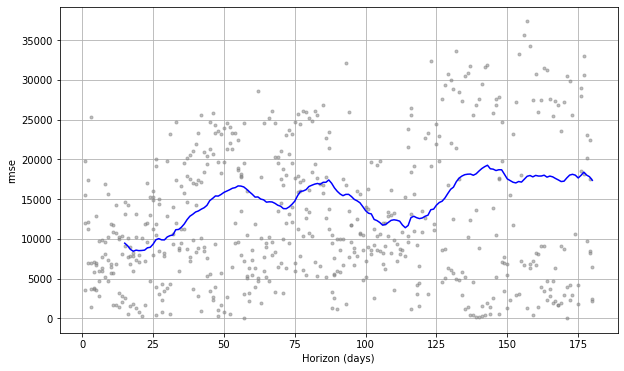

In [29]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [32]:
prediction[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2023-05-17,39851.305111,28462.136607,50643.913420
532,2023-05-18,40728.649203,28820.047868,52540.280632
533,2023-05-19,41007.498404,29234.500081,52597.816853
534,2023-05-20,40658.999196,27701.793898,52330.246948
535,2023-05-21,40205.505365,27948.570738,51596.654967
...,...,...,...,...
726,2023-11-28,37835.438861,25933.556019,49056.473999
727,2023-11-29,37553.384192,26268.159439,48287.344949
728,2023-11-30,38430.728284,26531.868444,50254.107593
729,2023-12-01,38709.577485,26782.334366,49598.085164


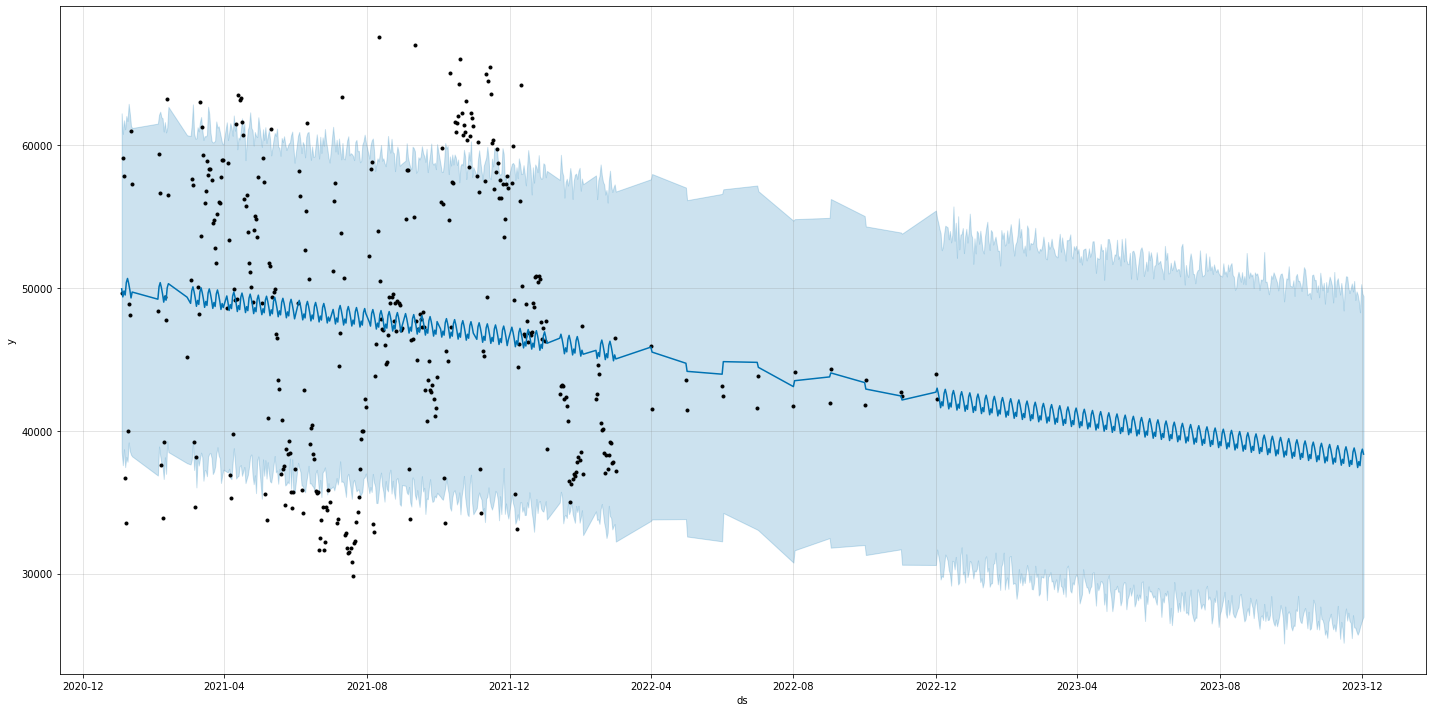

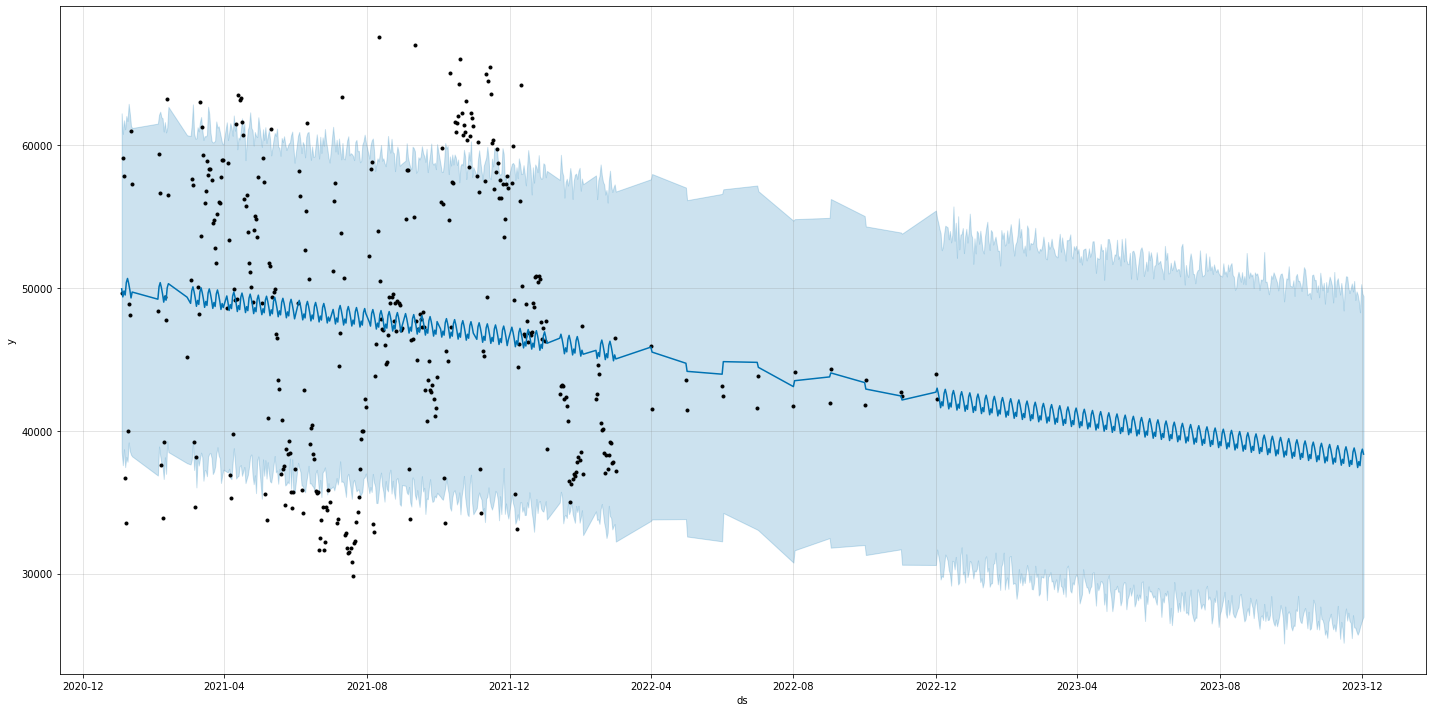

In [33]:
from fbprophet.plot import plot
prophet.plot(prediction, figsize=(20, 10))